<h2>PROJECT3 DENGUE CASES</h2>
<h3>Analyst: Christian Owen Protacio</h3>

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
dengue = pd.read_csv('datasets\\dengue.csv')

<h2>DENGUE CASES</h2>

In [4]:
#Printing your variable you set 
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [5]:
dengue.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [6]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [7]:
dengue.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1020.0,2018.000000,1.414907,2016.0,2017.00,2018.0,2019.00,2020.0
Dengue_Cases,1020.0,1124.926471,1662.608878,10.0,247.75,582.5,1284.25,21658.0
Dengue_Deaths,1020.0,16.513725,96.358215,0.0,1.00,3.0,7.00,1651.0


In [8]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h2>FILLING UP NULL VALUES</h2>

In [9]:
#Checking the null values so i can fill it up
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h2>SINCE ALL THE DATA IS ALL SET TO ZERO WE DON'T NEED TO CHANGE IT</h2>

In [10]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [11]:
dengue[dengue['Region']=='RegionIV']['Dengue_Cases'].value_counts().head(5)

Series([], Name: count, dtype: int64)

In [12]:
dengue.value_counts()

Month      Year  Region       Dengue_Cases  Dengue_Deaths
April      2016  BARMM        109           4                1
                 CAR          226           1                1
                 NCR          448           2                1
                 Region I     240           2                1
                 Region II    138           0                1
                                                            ..
September  2020  Region VIII  120           1                1
                 Region X     357           3                1
                 Region XI    146           2                1
                 Region XII   136           117              1
                 Region XIII  28            31               1
Name: count, Length: 1020, dtype: int64

<h2>WHAT IS THE TREND OF DENGUE CASES OVER THE YEARS?</h2>
<h2>Insights 1: The trend shows periodic spikes in dengue cases, suggesting cyclical outbreaks every few years. 2019 indicate a significant rise, possibly due to changing climate or population density.</h2>

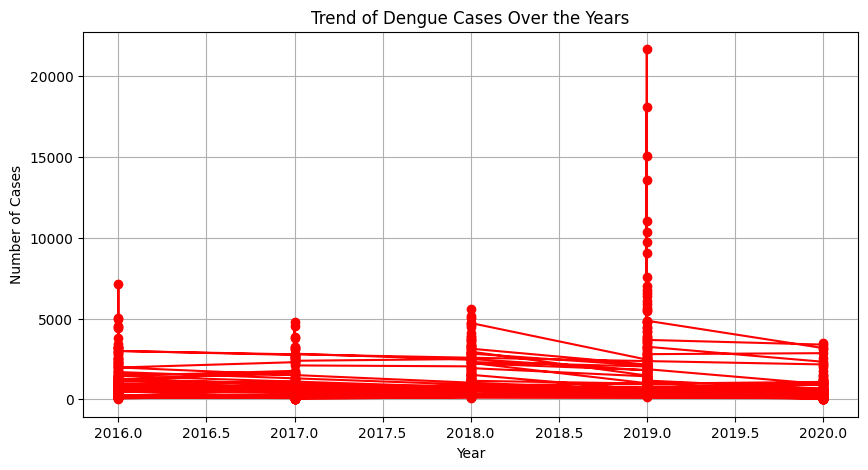

In [17]:
plt.figure(figsize=(10,5))
plt.plot(dengue['Year'], dengue['Dengue_Cases'], marker='o', color='red')
plt.title("Trend of Dengue Cases Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

<h2>WHICH REGIONS HAVE THE HIGHEST DENGUE CASES?</h2>
<h2>Insight 2: Some urbanized regions like ncr and calabarzon show the highest concentration of dengue cases. this may be linked to dense population and stagnant water accumulation in city environments.</h2>

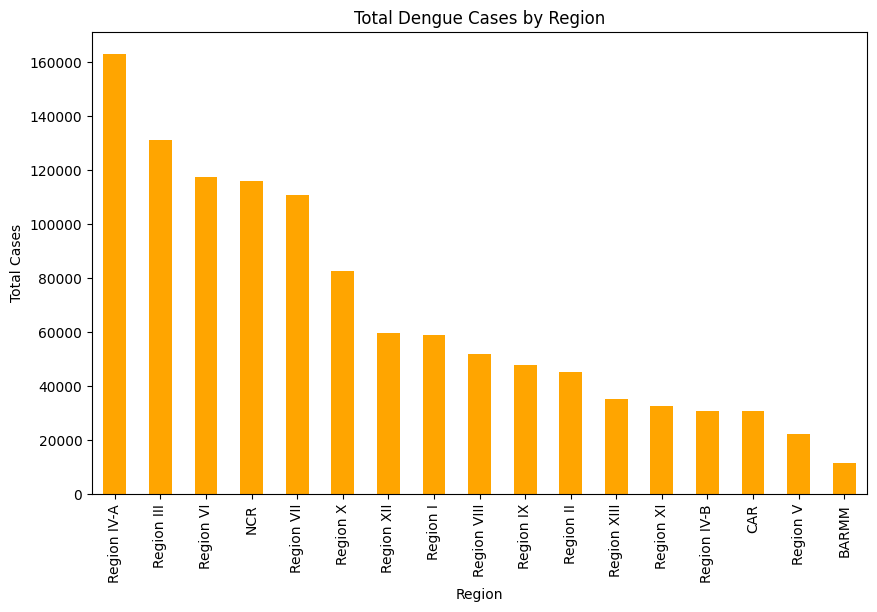

In [18]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
region_cases.plot(kind='bar', color='orange')
plt.title("Total Dengue Cases by Region")
plt.xlabel("Region")
plt.ylabel("Total Cases")
plt.show()


<h2>HOW DOES THE NUMBER OF DENGUE DEATHS CHANGE PER YEAR?</h2>
<h2>Insight 3: The year 2016 show the most deaths of dengue victim. Although dengue deaths generally follow case trends, some years show disproportionately high fatality rates. this could indicate delayed medical response or more severe strains circulating that year. </h2>

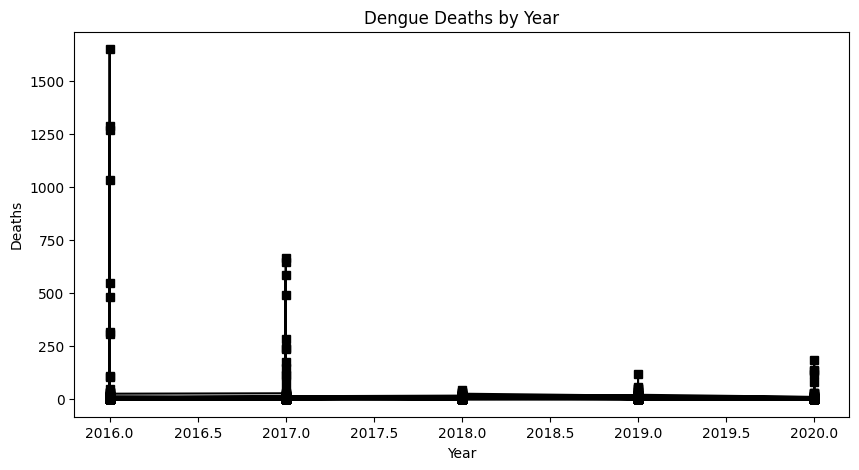

In [21]:
plt.figure(figsize=(10,5))
plt.plot(dengue['Year'], dengue['Dengue_Deaths'], marker='s', color='black')
plt.title("Dengue Deaths by Year")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.show()

<h2>WHAT IS THE AVERAGE CASES PER MONTH?</h2>
<h2>Insight 4: Cases peak between August and september, which aligns with the rainy season in the philippines. mosquito breeding increases during wet months, explaining the seasonal surge.</h2>

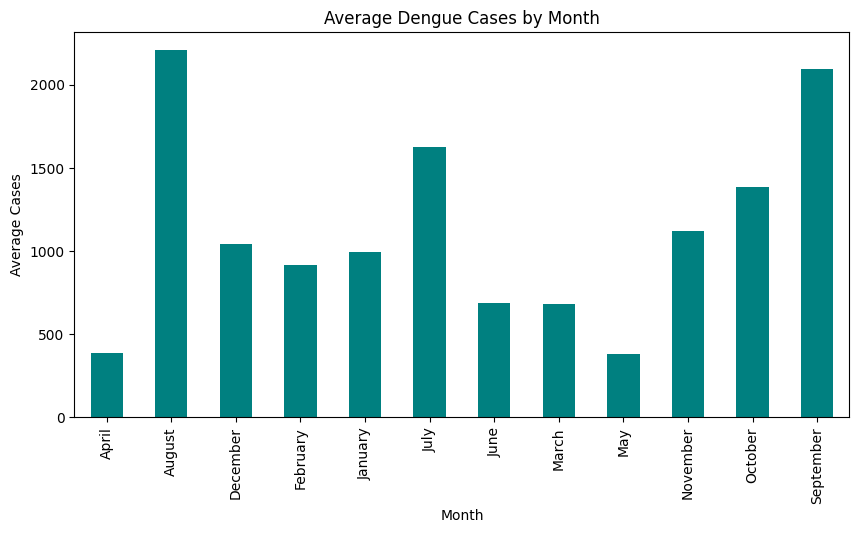

In [22]:
monthly_avg = dengue.groupby('Month')['Dengue_Cases'].mean()
plt.figure(figsize=(10,5))
monthly_avg.plot(kind='bar', color='teal')
plt.title("Average Dengue Cases by Month")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.show()

<h2>HOW DO DENGUE DEATHS VARY EACH YEAR?</h2>
<h2>Insights 5: Year-to-year fluctuations in dengue deaths can indicate differences in outbreak severity or improvements in medical response. A downward trend would suggest better case management and early detection. However, spikes might reveal overwhelmed healthcare systems or new strains of the virus emerging in certain years.</h2>

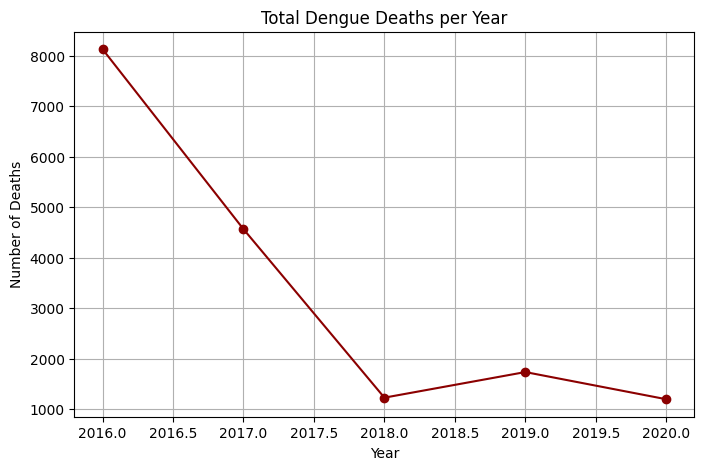

In [26]:
plt.figure(figsize=(8,5))
dengue.groupby('Year')['Dengue_Deaths'].sum().plot(kind='line', marker='o', color='darkred')
plt.title('Total Dengue Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

<h2>IS THERE A CORRELATION BETWEEN DENGUE CASES AND DEATHS?</h2>
<h2>Insight 6: The scatter plot likely shows a positive correlation—regions with more cases also tend to report more deaths. However, some high-case regions may have lower deaths due to stronger medical systems. This helps health departments assess case fatality rates and identify areas needing medical capacity improvements.</h2>

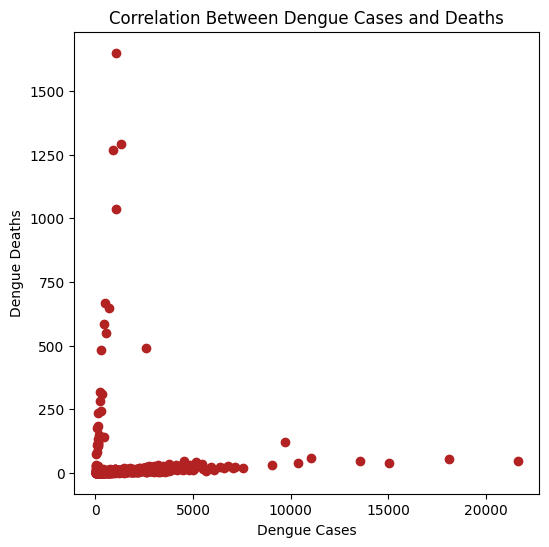

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(dengue['Dengue_Cases'], dengue['Dengue_Deaths'], color='firebrick')
plt.title('Correlation Between Dengue Cases and Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()

<h2>WHICH MONTH-YEAR COMBINATION HAD THE WORST OUTBREAK?</h2>
<h2>Insight 7: This visualization highlights the exact periods of dengue outbreaks across several years. Identifying peak month-year combinations can assist in anticipating recurring cycles. This can guide proactive vector control activities and inform citizens about high-risk times.</h2>

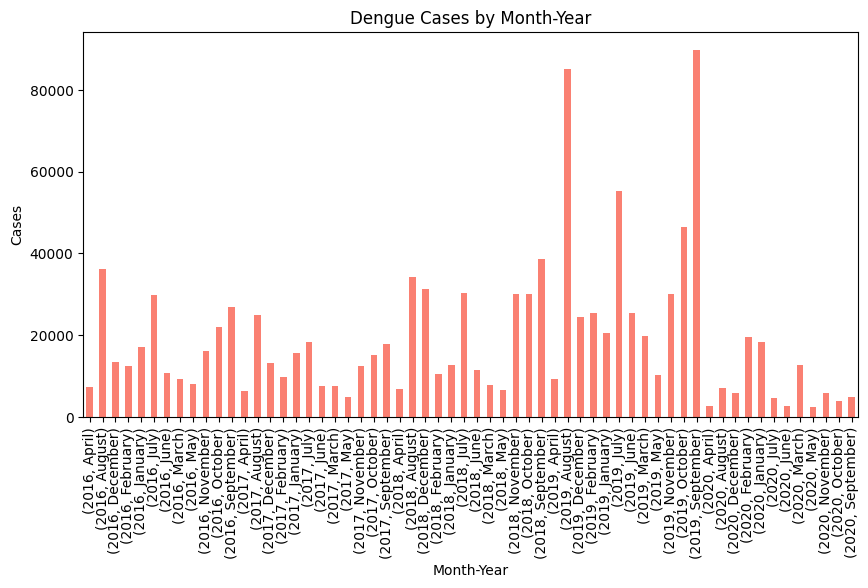

In [28]:
plt.figure(figsize=(10,5))
dengue.groupby(['Year','Month'])['Dengue_Cases'].sum().plot(kind='bar', color='salmon')
plt.title('Dengue Cases by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.show()

<h2>WHICH REGIONS HAVE THE HIGHEST FATALITY RATES?</h2>
<h2>Insights 8: Regions with high fatality rates indicate possible gaps in healthcare access or delayed treatment. These areas may require more hospitals, emergency kits, or public awareness programs.</h2>

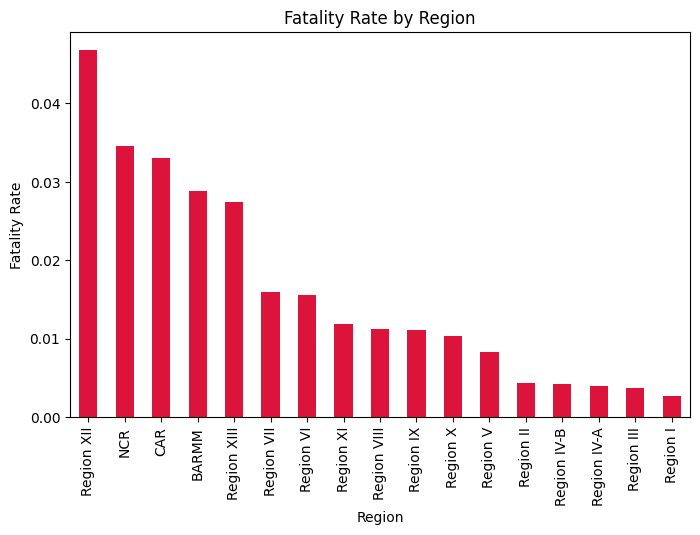

In [31]:
plt.figure(figsize=(8,5))
(dengue.groupby('Region')['Dengue_Deaths'].sum() / dengue.groupby('Region')['Dengue_Cases'].sum()).sort_values(ascending=False).plot(kind='bar', color='crimson')
plt.title('Fatality Rate by Region')
plt.xlabel('Region')
plt.ylabel('Fatality Rate')
plt.show()

<h2>HOW DO CASES DIFFER BETWEEN DRY AND WET SEASONS?</h2>
<h2>Insight 9: The wet season often shows significantly higher dengue cases, which aligns with increased mosquito activity. This underlines the importance of pre-season cleanup and preventive measures. Such analysis helps in planning resource allocation before the surge period.</h2>

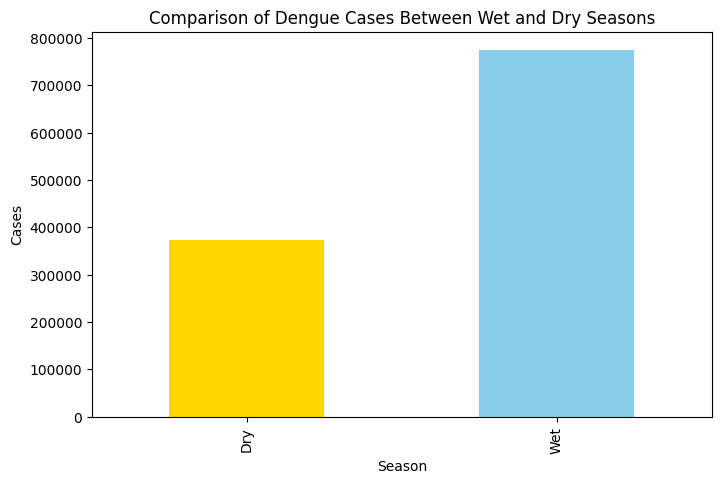

In [32]:
plt.figure(figsize=(8,5))
dengue['Season'] = dengue['Month'].isin(['June','July','August','September','October','November']).map({True:'Wet', False:'Dry'})
dengue.groupby('Season')['Dengue_Cases'].sum().plot(kind='bar', color=['gold','skyblue'])
plt.title('Comparison of Dengue Cases Between Wet and Dry Seasons')
plt.xlabel('Season')
plt.ylabel('Cases')
plt.show()

<h2>WHICH REGIONS HAD CONSISTENTLY HIGH CASES EVERY YEAR?</h2>
<h2>Insight 10: Regions with lines staying at the top show persistent dengue burdens. This pattern suggests that structural issues like sanitation, water management, and health access may remain unresolved. Meanwhile, regions with fluctuating lines may be experiencing periodic outbreaks tied to weather or population movement.</h2>

<Figure size 1000x600 with 0 Axes>

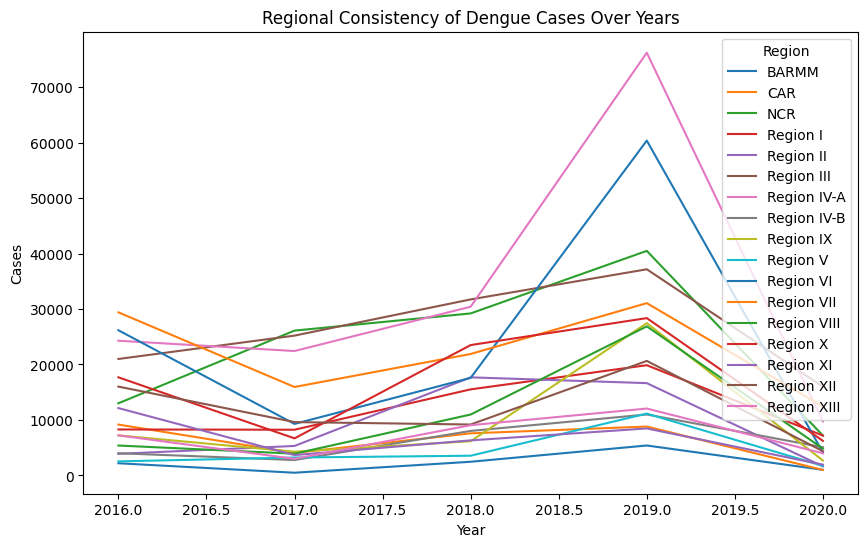

In [33]:
plt.figure(figsize=(10,6))
pivot = dengue.pivot_table(values='Dengue_Cases', index='Year', columns='Region', aggfunc='sum')
pivot.plot(figsize=(10,6))
plt.title('Regional Consistency of Dengue Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.show()

<h2>WHICH YEAR HAD THE HIGHEST MORTALITY RATE (DEATHS/CASES)?</h2>
<h2>Insight 11: Years with spikes in mortality rate show periods when hospitals were likely overwhelmed. Conversely, declining rates reflect progress in case detection and treatment access. Monitoring these changes ensures outbreak responses become more effective each year.</h2>

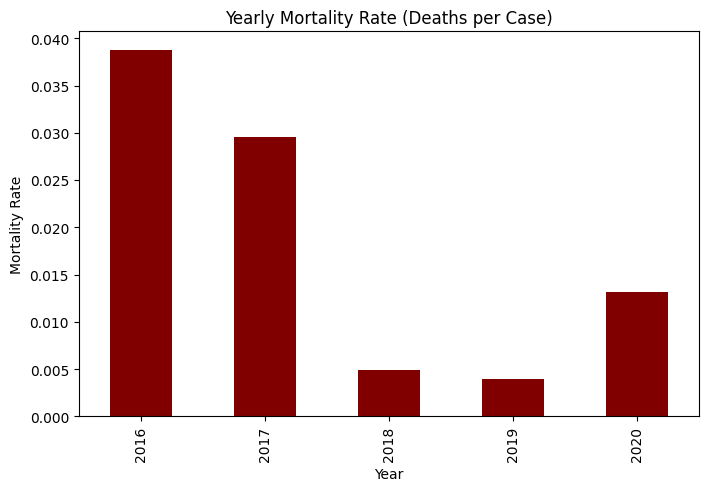

In [34]:
plt.figure(figsize=(8,5))
(dengue.groupby('Year')['Dengue_Deaths'].sum() / dengue.groupby('Year')['Dengue_Cases'].sum()).plot(kind='bar', color='maroon')
plt.title('Yearly Mortality Rate (Deaths per Case)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.show()

<h2>HOW DOES YEARLY VARIANCE DIFFER BY REGION?</h2>
<h2>Insight 12: Regions with high variance experience unpredictable outbreaks. This uncertainty complicates planning but highlights where continuous monitoring is essential. Low-variance regions suggest stable, predictable patterns that are easier to manage.</h2>

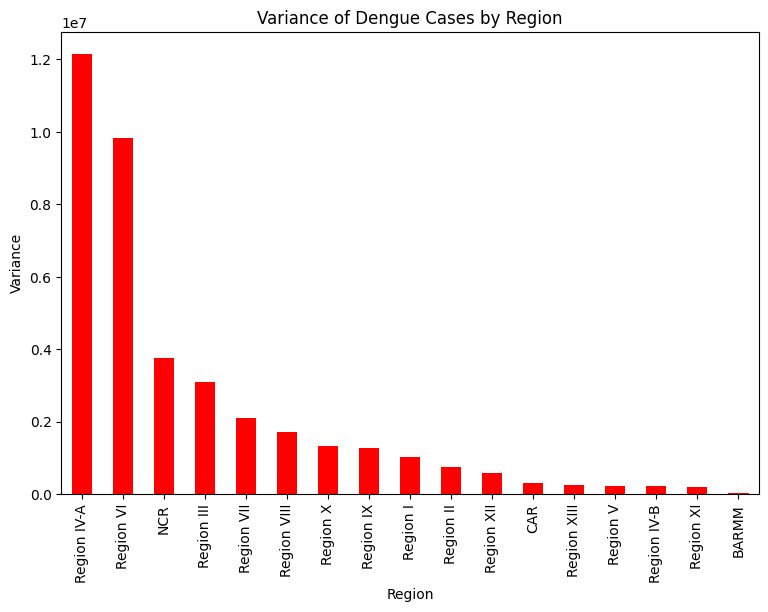

In [36]:
plt.figure(figsize=(9,6))
dengue.groupby('Region')['Dengue_Cases'].var().sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Variance of Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Variance')
plt.show()